# Zomato Data Analysis 

Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city that has more than 12,000 restaurants with restaurants serving dishes from all over the world. 

It will be helpful for new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data from csv file

In [3]:
data = pd.read_csv('zomato.csv')

# Basic Understanding of data

In [4]:
# Dimension of data
data.shape

(51717, 17)

In [5]:
# Datatypes of the columns in the dataset
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
# Top two rows of dataset
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


Columns description:

url - the url of the restaurant in the zomato website

address - the address of the restaurant in Bengaluru

name - the name of the restaurant

online_order - whether online ordering is available in the restaurant or not

book_table - table booking option available or not

rate - the overall rating of the restaurant out of 5

votes - total number of rating for the restaurant as of the above mentioned date

phone - the phone number of the restaurant

location - the neighborhood in which the restaurant is located

rest_type - type of restaurant 

dish_liked - dishes that people liked in the restaurant

cuisines - food styles

approx_cost(for two people) - the approximate cost for meal for two people

reviews_list - reviews for the restaurant

menu_item - list of menus available in the restaurant

listed_in(type) - type of meal

listed_in(city) - the neighborhood in which the restaurant is listed

In [7]:
# check for duplicated values
data.duplicated().sum()

0

There is no duplicate data here.

In [8]:
# Percentage of missing data
pd.DataFrame((data.isnull().sum()/data.shape[0])*100,columns = ['missing_perc'])

,missing_perc
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606
rest_type,0.438927


The variables 'dish_liked' has 54% and 'rate' has 15% of missing data. 

In [9]:
# Let us remove 'url', 'address' and 'phone' which doesn't give insights to the data
data = data.drop(['url', 'address', 'phone'], axis=1)
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
# Renaming few variables for our convenience
data = data.rename(columns = {'approx_cost(for two people)':'cost_of_two', 'listed_in(type)':'service_type', 'listed_in(city)':'service_availability'})
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_of_two', 'reviews_list',
       'menu_item', 'service_type', 'service_availability'],
      dtype='object')

# Exploratory Data Analysis

# Top restaurant Chains in Bengaluru

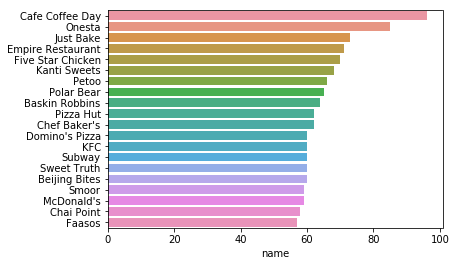

In [11]:
top_rest = data.name.value_counts()[:20]
sns.barplot(x = top_rest, y = top_rest.index, data=data)

As you can see, 'Cafe Coffee Day', 'Onesta' and 'Just Bake' has most number of outlets in and around Bengaluru

In [12]:
def loc_based_count(column, name):
    dat = data.loc[data[column] == name].groupby('location').agg('count')
    dat = np.transpose(pd.DataFrame([dat.index, dat.name]))
    dat.columns = ['Name', 'Count']
    dat = dat.sort_values('Count', ascending = False)
    return dat[:5]

In [16]:
# More about 'Cafe Coffee Day' outlets
loc_based_count('name', 'Cafe Coffee Day').style.hide_index()

Name,Count
Sarjapur Road,8
Bannerghatta Road,6
Jayanagar,6
Marathahalli,5
Banashankari,4


More number of 'Cafe Coffee Day' outlets are at Sarjapur Road

# How many restaurants do not accept online orders?

([<matplotlib.patches.Wedge at 0x234d9d62dd8>,
 [Text(-1.0576006311422714, -0.302458104549158, 'Yes'),
  Text(1.0576006311422714, 0.30245810454915784, 'No')],
 [Text(-0.576873071532148, -0.16497714793590434, '58.9%'),
  Text(0.5768730715321481, 0.16497714793590426, '41.1%')])

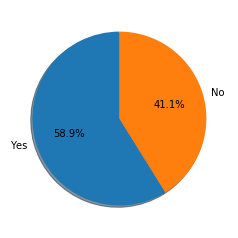

In [17]:
online_ord = data.online_order.value_counts()
plt.pie(online_ord, labels=online_ord.index, autopct='%1.1f%%', shadow=True, startangle=90)

1. As clearly indicated,58.9 percent of restaurants in Banglore accepts online orders.
2. Nearly 41 percent of the restaurants do not accept online orders.

The reason may be that these restaurants cannot afford to pay commission to zomoto for giving them orders online.
Zomato will have to consider giving them some offers if they want to increase the number of restaurants serving their customers online.

# Restaurants supporting table booking 

([<matplotlib.patches.Wedge at 0x234d9a6ffd0>,
 [Text(-1.0166665902958882, 0.41998695715001977, 'No'),
  Text(1.0166666001263924, -0.41998693335322057, 'Yes')],
 [Text(-0.5545454128886663, 0.22908379480910165, '87.5%'),
  Text(0.5545454182507594, -0.2290837818290294, '12.5%')])

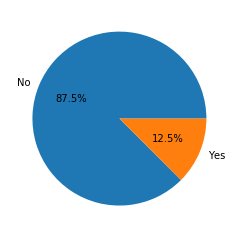

In [18]:
table_book = data.book_table.value_counts()
plt.pie(table_book, labels = table_book.index, autopct='%1.1f%%')

87 percent of restaurants don't provide table booking facility.

# Rating distribution

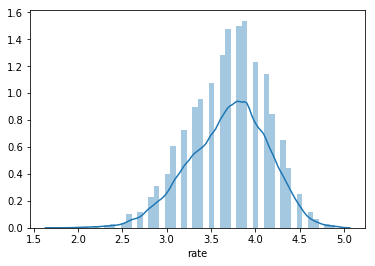

In [19]:
rate = data.rate.dropna().apply(lambda x: float(x.split('/')[0]) if len(x)>3 else np.nan).dropna()
sns.distplot(rate)

Most of the restaurants received rating between 3.5 and 4.
Restaurants having rating above 4.5 and below 2.5 are very less

# Online Order vs Rating

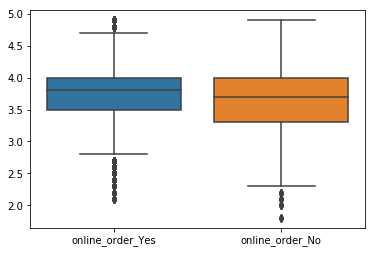

In [20]:
votes_yes = data[data.online_order == 'Yes']['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if len(x)>3 else np.nan).dropna()
votes_no = data[data.online_order == 'No']['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if len(x)>3 else np.nan).dropna()
dat = np.transpose(pd.DataFrame([votes_yes.reset_index(drop=True), votes_no.reset_index(drop=True)]))
dat.columns = ['online_order_Yes', 'online_order_No']
sns.boxplot(data = dat)

Restaurants accepting online orders are getting higher ratings than the restaurants that do not accept online orders

# Booking table vs Rating

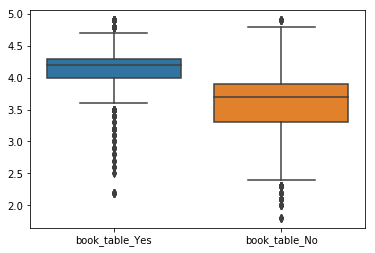

In [21]:
votes_yes = data[data.book_table == 'Yes']['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if len(x)>3 else np.nan).dropna()
votes_no = data[data.book_table == 'No']['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if len(x)>3 else np.nan).dropna()
dat = np.transpose(pd.DataFrame([votes_yes.reset_index(drop=True), votes_no.reset_index(drop=True)]))
dat.columns = ['book_table_Yes', 'book_table_No']
sns.boxplot(data = dat)

Restaurants accepting pre-table booking are getting higher ratings than the restaurants that do not accept pre-booking.

# Food lovers preferred location

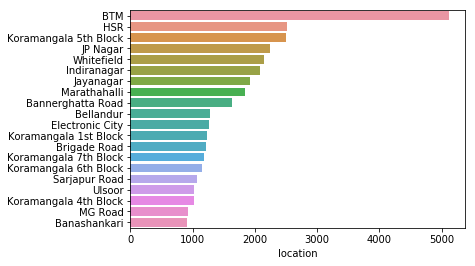

In [22]:
top_loc = data.location.value_counts()[:20]
sns.barplot(x = top_loc, y = top_loc.index, data = data)

As we can see, 'BTM' is the most popular location which has around 5000 restaurants. 'HSR', 'Koramangala 5th Block', 'JP nagar' and 'Whitefield' are the locations that are preferred next by the foodies.

# Most common restaurant type in Bengaluru

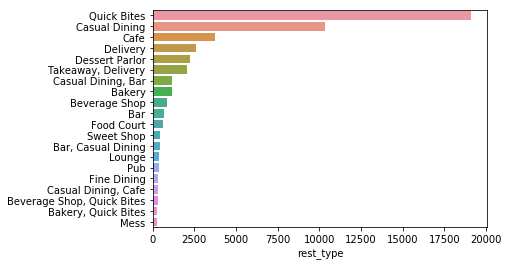

In [23]:
rest_type = data.rest_type.value_counts()[:20]
sns.barplot(x = rest_type, y = rest_type.index, data = data)

The quick bite restaurants dominate here. In midst of busy schedules, people tend to have quick bites rather than a great meal. This might be the reason for this dominance.

In [24]:
def name_based_count(column, name):
    dat = data.loc[data[column] == name].groupby('name').agg('count')
    dat = np.transpose(pd.DataFrame([dat.index, dat.online_order]))
    dat.columns = ['Name', 'Count']
    dat = dat.sort_values('Count', ascending = False)
    return dat[:5]

# Popular 'Quick Bites' restaurants

In [25]:
name_based_count('rest_type', 'Quick Bites').style.hide_index()

Name,Count
Five Star Chicken,69
Domino's Pizza,60
McDonald's,59
KFC,56
Ambur Hot Dum Biryani,53


# Popular 'Casual Dining' restaurants

In [26]:
name_based_count('rest_type', 'Casual Dining').style.hide_index()

Name,Count
Empire Restaurant,58
Beijing Bites,48
Mani's Dum Biryani,47
Chung Wah,46
Toscano,41


# Most Popular Cuisines 

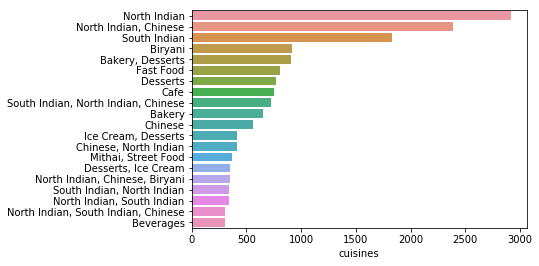

In [27]:
cuisines = data.cuisines.value_counts()[:20]
sns.barplot(x = cuisines, y= cuisines.index, data = data)

It can be seen that North Indian and Chinese foods are most preferred than South Indian food.



Lets check more deep into it.

# More number of North Indian restaurants are at?

In [28]:
# Location based table which has more number of 'North Indian' Restaurants
loc_based_count('cuisines','North Indian').style.hide_index()

Name,Count
BTM,340
Whitefield,188
HSR,173
Bellandur,161
JP Nagar,157


It looks like locations where the restaurants serve 'North Indian' cuisines are in the south part of Bengaluru and thus we can assume that the area is more popolated with North Indian people.

# What about South Indian Restaurants?

In [29]:
loc_based_count('cuisines','South Indian').style.hide_index()

Name,Count
BTM,113
Jayanagar,99
Basavanagudi,89
JP Nagar,89
Banashankari,86


# Distribution of approximate cost for two people

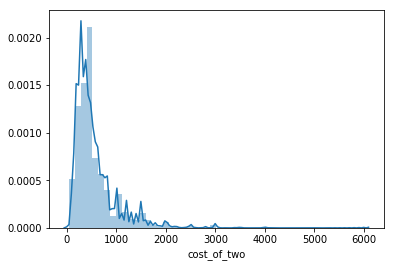

In [30]:
cost_two = data.cost_of_two.dropna().apply(lambda x: int(str(x).replace(',','')))
sns.distplot(cost_two)

Distribution is right skewed. Most of the restaurants charge less than 1000 rupees for two people and there are restaurants which charge 6000 rupees for two people.

# Most preferred Service types

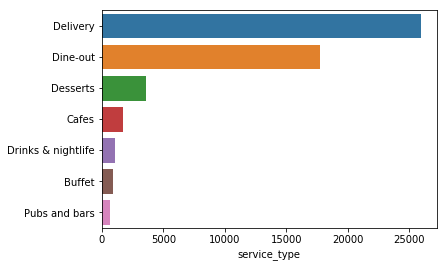

In [31]:
serv_type = data.service_type.value_counts()
sns.barplot(x = serv_type, y = serv_type.index, data = data)

People are using delivery option more than dining out.

# Budget Restaurants at each location

# Input 'location' and 'rest_type'

In [32]:
def loc_based_resttype(location, rest_type):
    dat = data[data['location'] == location][data['rest_type'] == rest_type]
    dat = np.transpose(pd.DataFrame([dat.name, dat.cost_of_two]))
    dat.cost_of_two = dat.cost_of_two.dropna().apply(lambda x: int(str(x).replace(',','')))
    dat = dat.sort_values('cost_of_two', ascending = True)
    return dat

loc = input('Preferred location ')
restype = input('Preferred restaurant type (Eg: Quick Bites, Casual Dining) ')

Preferred location Banashankari
Preferred restaurant type (Eg: Quick Bites, Casual Dining) Casual Dining


In [34]:
loc_based_resttype(loc, restype).style.hide_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


name,cost_of_two
Sri Krishna Sagar,400
Sri Krishna Sagar,400
Sri Krishna Sagar,400
Sri Krishna Sagar,400
New Imperial Restaurant,450
New Imperial Restaurant,450
Anna Kuteera,450
New Imperial Restaurant,450
Anna Kuteera,450
New Imperial Restaurant,450


Conlusion:

Here we did basic analysis on the restaurants at Bangalore using Zomato data from Kaggle. Data can be viewed at https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants